# 1. Perkenalan

Nama: Bintang Muhammad <br>
Course: Data Science <br>
Batch: 6 <br>

## About The Data

- The Data represents a customer from a Communication company, Telco.
- Each column contains customer’s attributes like subscription, gender, etc.
- Target variable: Churn.
- Objective: Create a few Neural Network Models to predict the label.


# 2. Import Library

In [26]:
#import library
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pydot
import graphviz
from sklearn.metrics import classification_report
import tensorflow as tf
import pickle

# 3. Data Loading

In [27]:
#data loading
df=pd.read_csv('telco.csv')

In [28]:
#view data
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Data consists of customers profile data of telecommunication company.
- The target variable is churn.
- There is some columns that the data type need to be changed.

# 4. Data Cleaning

In [29]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Data consists of 7043 rows and 21 columns
- There is 1 float, 2 integer and 18 object data type
- There is no null valus on the data.

In [30]:
#check null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- No null values on the data

In [31]:
#view duplicate data
df.duplicated().sum()

0

- No duplicate values on the data

In [32]:
#fix error on the data
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There is null values on the data after fixing the error

In [33]:
#remove null values
df=df.dropna()

In [34]:
#check null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- no null after cleaning

In [35]:
#view data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


After cleaning:

- Data consists of 7032 rows and 21 columns
- There is 2 float, 2 integer and 17 object data type

In [36]:
#exclude customer id
df2=df.iloc[:,1:]

In [37]:
#lower case all column name
df2=df2.rename(columns=str.lower)

In [38]:
#change data object
df2=df2.astype({'seniorcitizen':object})

<AxesSubplot:>

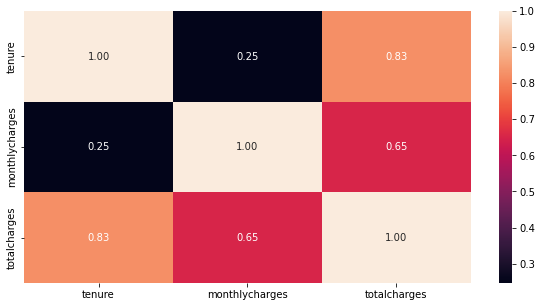

In [39]:
#view heatmap correlation to check redundant datas
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),annot=True, fmt='.2f')

In [40]:
#drop tenure column because redundant with total charges
df2=df2.drop(columns=['tenure'])

# 5. Data Exploration

| Variable | Definition |
| ----------- | ----------- | 
|CustomerID:| A unique ID that identifies each customer. |
|Count:| A value used in reporting/dashboarding to sum up the number of customers in a filtered set.|
|Gender:| The customer’s gender: Male, Female.|
|Age:| The customer’s current age, in years, at the time the fiscal quarter ended.|
|Senior Citizen:| Indicates if the customer is 65 or older: Yes, No.|
|Married:| Indicates if the customer is married: Yes, No.|
|Dependents:| Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.|
|PhoneService:|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines:|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService:|Customer’s internet service provider (DSL, Fiber optic, No))|
|OnlineSecurity:|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup:|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection:|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport:|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV:|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies:|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract:|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling:|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod:|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges:|The amount charged to the customer monthly|
|TotalCharges:|The total amount charged to the customer|
|Churn:|Whether the customer churned or not (Yes or No)|

In [41]:
#view data info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   seniorcitizen     7032 non-null   object 
 2   partner           7032 non-null   object 
 3   dependents        7032 non-null   object 
 4   phoneservice      7032 non-null   object 
 5   multiplelines     7032 non-null   object 
 6   internetservice   7032 non-null   object 
 7   onlinesecurity    7032 non-null   object 
 8   onlinebackup      7032 non-null   object 
 9   deviceprotection  7032 non-null   object 
 10  techsupport       7032 non-null   object 
 11  streamingtv       7032 non-null   object 
 12  streamingmovies   7032 non-null   object 
 13  contract          7032 non-null   object 
 14  paperlessbilling  7032 non-null   object 
 15  paymentmethod     7032 non-null   object 
 16  monthlycharges    7032 non-null   float64


- Data consists of 299 rows and 13 columns
- There is 3 float, 6 Object and 10 integer data type

In [42]:
#view statistics
df2.describe()

,monthlycharges,totalcharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


- The mean and median of monthly charges does not differ much.
- The range of monthly charges between Q3 to Max Value does not have much range same with Q1 and Min range, meaning there is most likely little or no outliers.

- The mean and median of total charges have a large difference. so there is a possibility that this is a skewed distribution.
- The range of total charges between Q3 to Max Value have much range meaning there is most likely it is positively skewed.

In [43]:
#create numerical data names
nums=df2.select_dtypes(include=['int64','float64']).columns

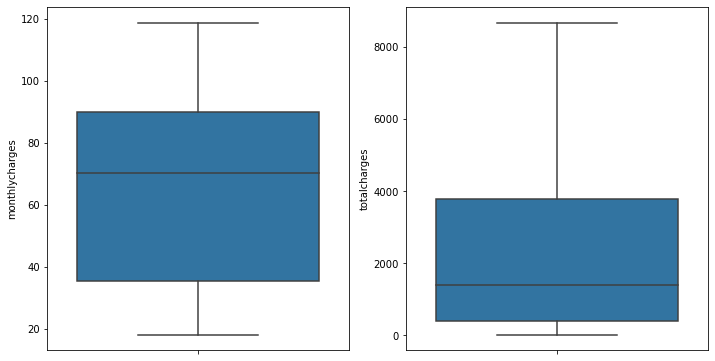

In [44]:
#visualize data with box plot
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(3,4, i+1)
    sns.boxplot(y=df2[nums[i]], orient='v')
    plt.tight_layout()

- There are no outliers on the data

In [45]:
#took numericaldata type
nums2=df2.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column monthlycharges outliers = 0.00%
Column totalcharges outliers = 0.00%


- There are no outliers on the data

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


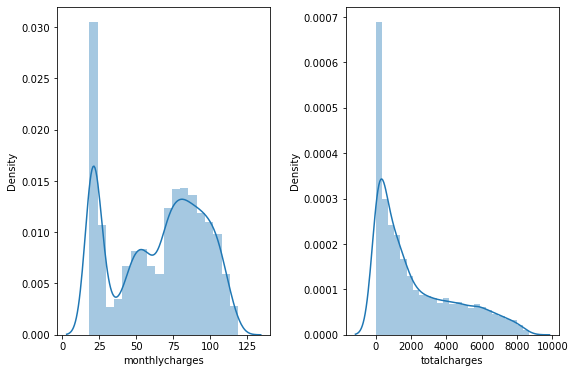

In [46]:
#visualize data with box plot
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2,5, i+1)
    sns.distplot(df2[nums[i]])
    plt.tight_layout()

- Total Charges is positively skewed
- Monthly charges is Bimodal

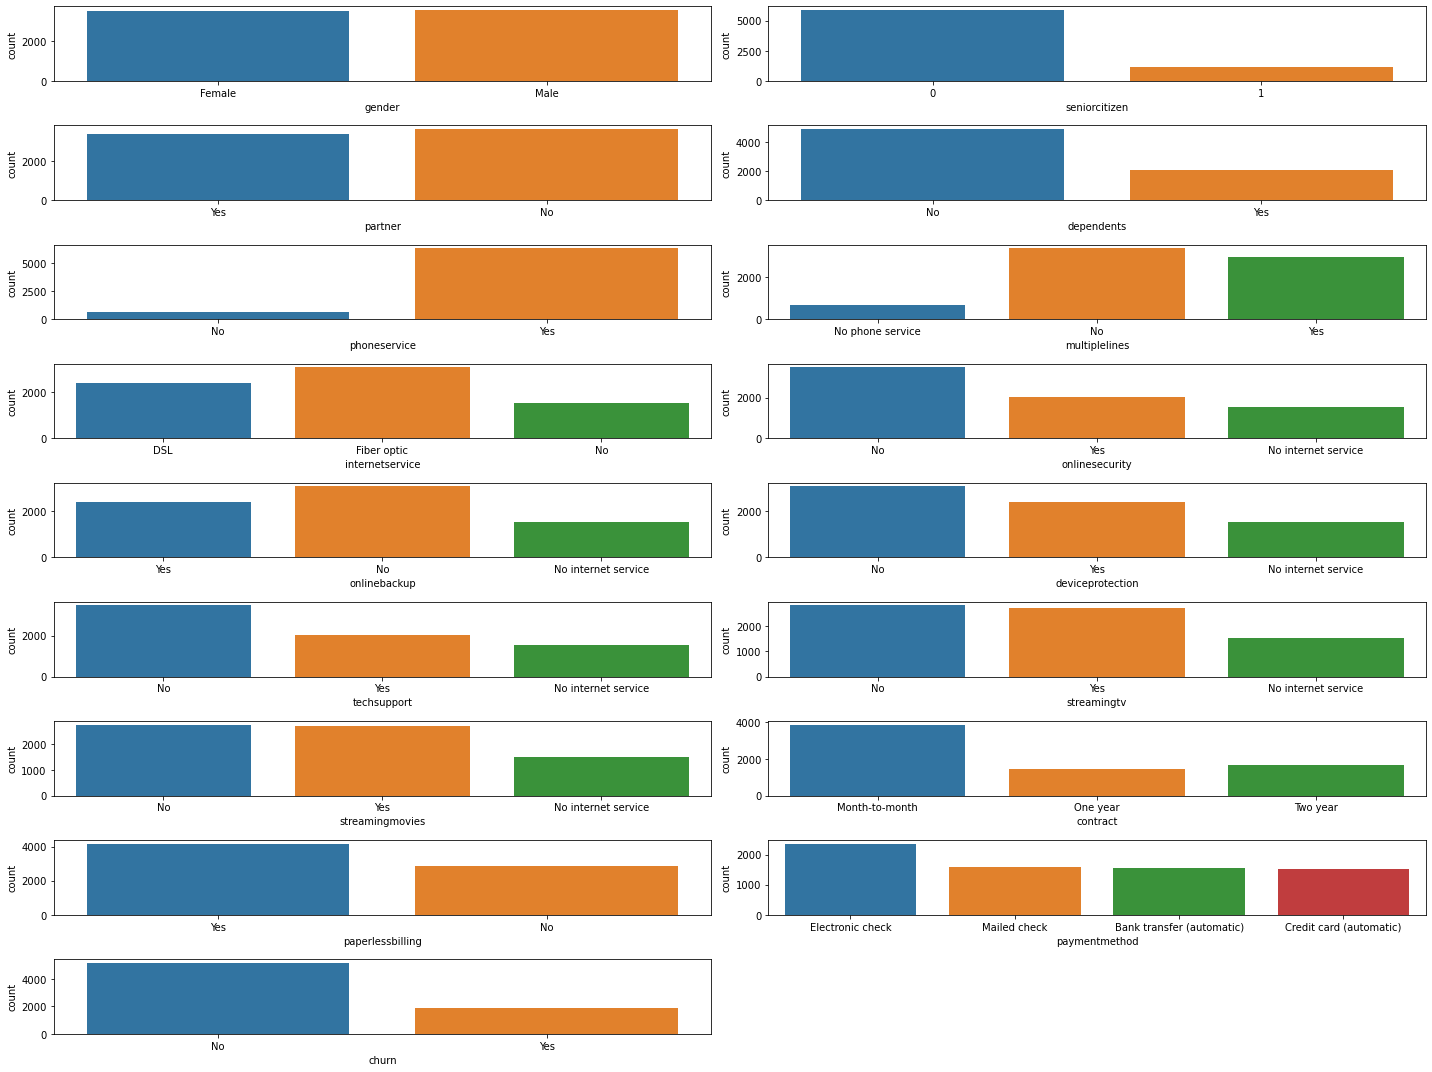

In [47]:
#create cats columns
cats=df2.select_dtypes(object).columns
#create countplot
plt.figure(figsize=(20, 15));
for i in range(0, len(cats)):
    plt.subplot(9, 2, i+1);
    sns.countplot(x=df2[cats[i]], orient='v');
    plt.tight_layout();

- The data target (churn) is imbalance
- Most of the customers is not a senior citizen,and most of the cust does not have a dependents.
- The customers from this data evenly consists of male and female.
- The number of customers who have partner and does not have a partner is almost the same.
- The customer behaviour is that most of them have a monthly subscription, prefer paperless billing and pays via electronic check
- Most of the customer have phoneservice
- Most of the customers does not have multiple lines, followed by have multiple lines
- Most of the customers have fiber optic internet service and have dsl internet service


In [48]:
#create rain columns
dfr=df.groupby(['gender','SeniorCitizen']).count()[['customerID']]
dfr=dfr.sort_values('customerID',ascending=False).rename(columns={'customerID':'count'}).reset_index()
dfr

,gender,SeniorCitizen,count
0,Male,0,2975
1,Female,0,2915
2,Male,1,574
3,Female,1,568


- The count of Male and Female of non Senior Citizen is almost the same between Male and Female
- The count of Male and Female of Senior Citizen is almost the same between Male and Female

In [49]:
#create rain columns
dfr=df.groupby(['OnlineSecurity','Churn']).count()[['customerID']]
dfr=dfr.sort_values(['Churn','customerID'],ascending=False).rename(columns={'customerID':'count'}).reset_index()
dfr

,OnlineSecurity,Churn,count
0,No,Yes,1461
1,Yes,Yes,295
2,No internet service,Yes,113
3,No,No,2036
4,Yes,No,1720
5,No internet service,No,1407


- The customers that churn mostly does not have Online Security
- The second category that churns have an online security, but only few of them churns

In [50]:
#create rain columns
dfr=df.groupby(['Contract','Churn']).count()[['customerID']]
dfr=dfr.sort_values(['Churn','customerID'],ascending=False).rename(columns={'customerID':'count'}).reset_index()
dfr

,Contract,Churn,count
0,Month-to-month,Yes,1655
1,One year,Yes,166
2,Two year,Yes,48
3,Month-to-month,No,2220
4,Two year,No,1637
5,One year,No,1306


- The customers that churn mostly on an Month to month contract
- The second category that churns have an online security, but only few of them churns

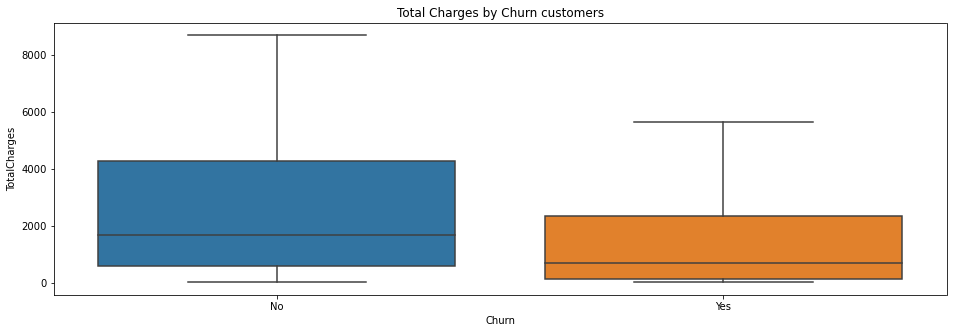

In [51]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Total Charges by Churn customers')
ax = sns.boxplot(data=df, x='Churn', y='TotalCharges', showfliers=False)
plt.show()

- The Total charges range from churn customers is larger than Total Charges from customers that did not churn 

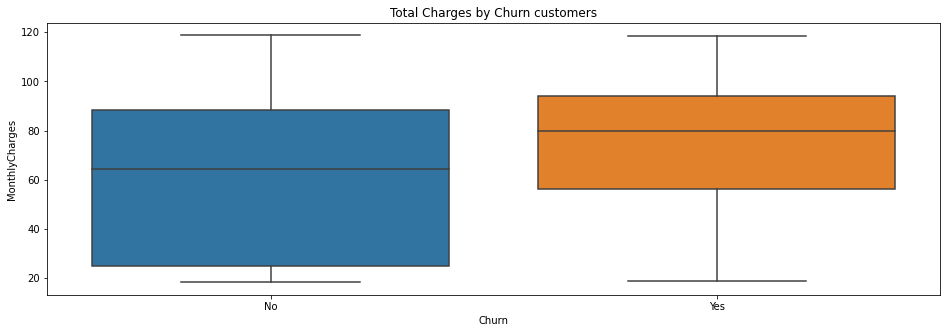

In [52]:
#view clusters based on overall life expectancy
plt.figure(figsize=(16,5))
plt.title(f'Total Charges by Churn customers')
ax = sns.boxplot(data=df, x='Churn', y='MonthlyCharges', showfliers=False)
plt.show()

- The Monthly charges range from churn customers is larger than the Monthly Charges from customers that did not churn.
- This maybe the cause people are churning.


### Data Exploration Summary:

- The Numerical data does not have an outliers
- The customers that churns mostly came from thoose who have monthly contract and does not have online security
- Both the two numerical features have a skewed distribution

# 6. Data Preprocessing

In [53]:
#label encoding
df3=df2.copy()
columns2=df3.select_dtypes(['object']).columns
lb=LabelEncoder()
for i in columns2:
    df3[i]=lb.fit_transform(df3[i])

In [54]:
#shuffle data
df3a=df3.sample(frac=1).reset_index(drop=True)

In [55]:
#drop and take target features
target=df3a.pop('churn')

In [56]:
#split data
xtrain,xtemp,ytrain,ytemp =train_test_split(df3a,target,train_size=0.8, random_state=37,stratify=target)
xvalid,xtest,yvalid,ytest=train_test_split(xtemp,ytemp,train_size=0.5,random_state=37)

In [57]:
#create pipeline
xtrain=tf.convert_to_tensor(xtrain)
#create pipeline
xtest=tf.convert_to_tensor(xtest)
#create pipeline
xvalid=tf.convert_to_tensor(xvalid)

In [58]:
#normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(xtrain)

# 7. Define Model

- The main metrics on this model will be recall, because we dont want a customer that predicted will not churn, is actually churning (False Negative)
- We will ignore accuracy, because the dataset target data is quite imbalanced

## Sequential API

In [60]:
#define model
np.random.seed(42)
tf.random.set_seed(42)
modelseq=Sequential()
#1
modelseq.add(Dense(100, input_dim=18, activation='relu'))
#2
modelseq.add(Dense(90, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#3
modelseq.add(Dense(80, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#4
modelseq.add(Dense(70, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#5
modelseq.add(Dense(60, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#6
modelseq.add(Dense(50, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#7
modelseq.add(Dense(40, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#8
modelseq.add(Dense(30, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#9
modelseq.add(Dense(20, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#10
modelseq.add(Dense(10, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
#11
modelseq.add(Dense(1,activation='sigmoid',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))

modelseq.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy','Recall','Precision'])

- 9 Hidden layers with nodes starting from 100 was created

In [35]:
#model summary
modelseq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1900      
                                                                 
 dense_1 (Dense)             (None, 90)                9090      
                                                                 
 dense_2 (Dense)             (None, 80)                7280      
                                                                 
 dense_3 (Dense)             (None, 70)                5670      
                                                                 
 dense_4 (Dense)             (None, 60)                4260      
                                                                 
 dense_5 (Dense)             (None, 50)                3050      
                                                                 
 dense_6 (Dense)             (None, 40)                2

## Functional API

In [64]:
#create functional API
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=xtrain.shape[1:])
hidden1 = keras.layers.Dense(20, activation="relu")(input_)
hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(5, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(1, activation="relu")(hidden3)
concat = keras.layers.concatenate([input_, hidden4])
output = keras.layers.Dense(1,activation='sigmoid')(concat)
modelfun = keras.models.Model(inputs=[input_], outputs=[output])

modelfun.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['Accuracy','Recall','Precision'])

- $ Hidden layers with nodes starting from 100 was created

In [37]:
#model summary
modelfun.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 20)           380         ['input_1[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 10)           210         ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 5)            55          ['dense_12[0][0]']               
                                                                                              

# 8. Train Model

## Sequential API

In [62]:
#fitting training data to sequential API
history=modelseq.fit(xtrain,ytrain,epochs=30,validation_data=[xvalid,yvalid],batch_size=5,verbose=0)

## Functional API

In [65]:
#fitting training data to functional API
history2=modelfun.fit(xtrain,ytrain,epochs=30,validation_data=[xvalid,yvalid],batch_size=5,verbose=0)

# 9. Evaluate Model

- On This model, i will focus on the Recall value, because we dont want a False Negative value
- False Negative means that customers that supposed to be Churning was predicted as not Churning

## Sequential Model

In [40]:
#predict and eval model
ypred = modelseq.predict(xtest)

thres = 0.5
res = (ypred > thres).T
res2 = res.astype(int)[0]

data=ypred.tolist()

print(classification_report(ytest, res2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       522
           1       0.60      0.53      0.57       182

    accuracy                           0.79       704
   macro avg       0.72      0.71      0.71       704
weighted avg       0.78      0.79      0.78       704



- The recall on this model is quite low (0.49), this is bad, because this means that there is a lot of false negatives on the model

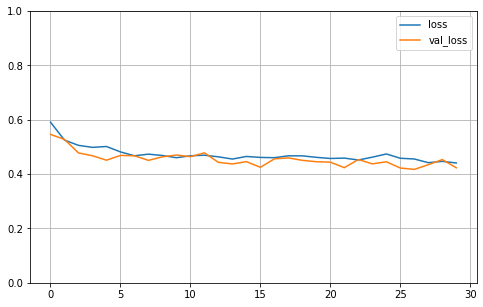

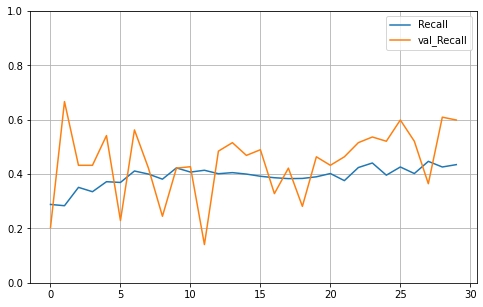

In [41]:
# visualize the chart
pd.DataFrame(list(zip(history.history['loss'],history.history['val_loss'])),
               columns =['loss', 'val_loss']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

pd.DataFrame(list(zip(history.history['recall'],history.history['val_recall'])),
               columns =['Recall', 'val_Recall']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>Loss</b>:

- The loss on this model is between the range 0.4 - 0.6
- Even though the validity loss is fluctuative, the up and downs is not big, and tend shape convergent with the train loss data

<b>Recall</b>:

- The Recall on this model is between the range 0.0 - 0.6
- The validity recall is highly fluctuative compared to train data recall.
- At the end of the graph, the shapes started to shape convergent, but the value is still low

## Functional Model

In [42]:
#predict and eval model
ypred = modelfun.predict(xtest)

thres = 0.5
res = (ypred > thres).T
res2 = res.astype(int)[0]

data=ypred.tolist()

print(classification_report(ytest, res2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       522
           1       0.26      1.00      0.41       182

    accuracy                           0.26       704
   macro avg       0.13      0.50      0.21       704
weighted avg       0.07      0.26      0.11       704



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- The recall on this model is almost close to 0, meaning theres a lot of False Negatives on this data
- This score is lower than the sequential API model

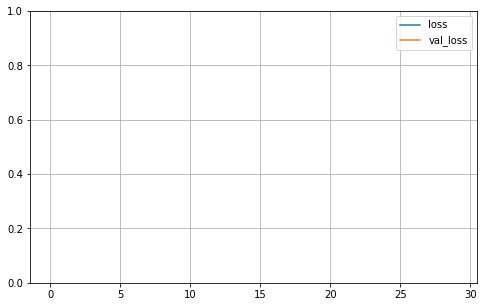

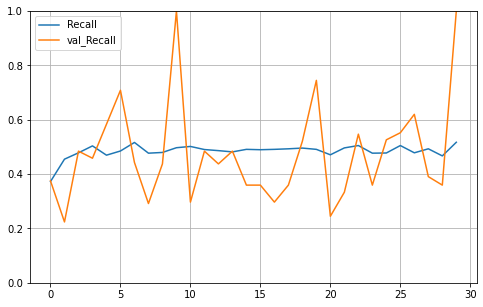

In [43]:
#view chart
pd.DataFrame(list(zip(history2.history['loss'],history2.history['val_loss'])),
               columns =['loss', 'val_loss']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)


pd.DataFrame(list(zip(history2.history['recall'],history2.history['val_recall'])),
               columns =['Recall', 'val_Recall']).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<b>Loss</b>:

- The loss on this model does not appear on the graph, i myself does not understand why this phenomenon occurs.

<b>Recall</b>:

- The Recall on this model is between the range 0.2 - 1
- The validity recall is highly fluctuative compared to train data recall.
- At the end of the graph, the shape does not form a convergent pattern, and the value is still low

## Summary

- The Sequential Model is better because have a higher recall
- However,i will try to improve both models

# 10. Model Saving

- Save only the best model to json

# 11. Model Improvement

- I will try to add batch normalization to Sequential and Functional Model

## Sequential Model

In [44]:
#define sequential model
np.random.seed(42)
tf.random.set_seed(42)
modelseq2=Sequential()
#1
modelseq2.add(Dense(100, input_dim=18, activation='relu'))
#2
modelseq2.add(Dense(90, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#3
modelseq2.add(Dense(80, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#4
modelseq2.add(Dense(70, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#5
modelseq2.add(Dense(60, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#6
modelseq2.add(Dense(50, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#7
modelseq2.add(Dense(40, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#8
modelseq2.add(Dense(30, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#9
modelseq2.add(Dense(20, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#10
modelseq2.add(Dense(10, activation='relu',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())
#11
modelseq2.add(Dense(1,activation='sigmoid',kernel_initializer=keras.initializers.GlorotNormal(seed=123)))
modelseq2.add(keras.layers.BatchNormalization())

modelseq2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy','Recall','Precision'])

In [45]:
#create functional API
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=xtrain.shape[1:])
hidden1 = keras.layers.Dense(20, activation="relu")(input_)
batchnorm1 = tf.keras.layers.BatchNormalization() (hidden1)
hidden2 = keras.layers.Dense(10, activation="relu")(batchnorm1)
batchnorm2 = tf.keras.layers.BatchNormalization() (hidden2)
hidden3 = keras.layers.Dense(5, activation="relu")(hidden2)
batchnorm3 = tf.keras.layers.BatchNormalization() (hidden3)
hidden4 = keras.layers.Dense(1, activation="relu")(hidden3)
batchnorm4 = tf.keras.layers.BatchNormalization() (hidden4)
concat = keras.layers.concatenate([input_, hidden4])
batchnorm5 = tf.keras.layers.BatchNormalization() (concat)
output = keras.layers.Dense(1,activation='sigmoid')(batchnorm5)
modelfun2 = keras.models.Model(inputs=[input_], outputs=[output])

modelfun2.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['Accuracy','Recall','Precision'])

# 12. Model Inference (with Model Improvement)

## Sequential model

In [46]:
#take new data
X_new = xtest[:10]
y_proba = modelseq2.predict(X_new)
y_proba.round(2)

array([[0.97],
       [1.  ],
       [0.83],
       [0.56],
       [0.94],
       [0.86],
       [0.84],
       [1.  ],
       [1.  ],
       [0.86]], dtype=float32)

## Functional Model

In [47]:
#take new data
X_new = xtest[:10]
y_proba = modelfun2.predict(X_new)
y_proba.round(2)

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

# 13. Summary

- The best model to predict is the model with Sequential API model compared to Functional API model, because have a higher recall, and the loss is explainable
- However, the model still needs more improvements since the recall is quite low.

The details of the architecture are: 

- Weight initialzation with glorot normal
- Have 10 hidden layers
- Have starting 100 nodes
- With loss is binary crossentrophy
- Optimizer is adam
- Epoch is 30 and batch size is 5